In [343]:
import seaborn as sns
import numpy as np
import ast
import csv
import os
import re
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import gensim
import nltk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pyLDAvis.gensim_models
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pyLDAvis import gensim
from gensim import corpora
from gensim import models
from IPython.display import display, HTML
from wordcloud import WordCloud
import string
import nltk
import re
import heapq
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

pd.options.display.max_columns - 100

0

In [256]:
# Initial Dataset review
df = pd.read_csv('movies.csv')
print(df.shape)
df.head(10)

(10000, 10)


,GenreIds,Id,OriginalLanguage,OriginalTitle,Overview,Popularity,ReleaseDate,Title,VoteAverage,VoteCount
0,"[28, 12, 53]",299054,en,Expend4bles,Armed with every weapon they can get their han...,3741.062,2023-09-15,Expend4bles,6.4,364
1,"[28, 53, 80]",926393,en,The Equalizer 3,Robert McCall finds himself at home in Souther...,2471.515,2023-08-30,The Equalizer 3,7.3,1027
2,"[16, 28, 14]",1034062,en,Mortal Kombat Legends: Cage Match,"In 1980s Hollywood, action star Johnny Cage is...",2223.430,2023-10-17,Mortal Kombat Legends: Cage Match,7.8,27
3,"[28, 53]",575264,en,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,2032.927,2023-07-08,Mission: Impossible - Dead Reckoning Part One,7.7,1799
4,"[53, 18]",1151534,es,Nowhere,A young pregnant woman named Mia escapes from ...,1627.678,2023-09-29,Nowhere,7.6,686
5,"[27, 9648, 53]",968051,en,The Nun II,"In 1956 France, a priest is violently murdered...",1594.559,2023-09-06,The Nun II,7.0,1086
6,"[28, 80, 53]",961268,ko,발레리나,Grieving the loss of a best friend she couldn'...,1521.075,2023-10-05,Ballerina,7.0,200
7,"[27, 53]",951491,en,Saw X,"Between the events of 'Saw' and 'Saw II', a si...",1469.177,2023-09-26,Saw X,7.3,287
8,"[12, 28, 18]",980489,en,Gran Turismo,The ultimate wish-fulfillment tale of a teenag...,1315.518,2023-08-09,Gran Turismo,8.1,1127
9,"[53, 878, 28]",937249,en,57 Seconds,When a tech blogger lands an interview with a ...,1304.978,2023-09-29,57 Seconds,5.4,111


In [257]:
# Checking movie details data

df2 = pd.read_csv('movie_details.csv')
print(df2.shape)
df2.head()

(10000, 8)


,Id,Budget,ProductionCompanies,ProductionCountries,SpokenLanguages,TagLine,RunTime,Revenue
0,299054,100000000,"[{'id': 1020, 'logo_path': '/kuUIHNwMec4dwOLgh...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",They'll die when they're dead.,103,30000000
1,926393,70000000,"[{'id': 1423, 'logo_path': '/1rbAwGQzrNvXDICD6...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...","[{'english_name': 'English', 'iso_639_1': 'en'...",Justice knows no borders.,109,176933602
2,1034062,0,"[{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",Neon lights... Suits with shoulder pads... Jum...,80,0
3,575264,291000000,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'French', 'iso_639_1': 'fr',...",We all share the same fate.,164,567148955
4,1151534,0,"[{'id': 204005, 'logo_path': None, 'name': 'Ro...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]","[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Attempting to survive in the middle of nowhere...,109,0


In [258]:
def inner_join(df1, df2, pk):
    '''This methods performs inner joint, based on given primery key'''
    return pd.merge(df1, df2, on=pk)

In [259]:
# Perform inner join to consolidate one single dataset
df = inner_join(df, df2, 'Id')
print(df.shape)
df.head()

(10000, 17)


,GenreIds,Id,OriginalLanguage,OriginalTitle,Overview,Popularity,ReleaseDate,Title,VoteAverage,VoteCount,Budget,ProductionCompanies,ProductionCountries,SpokenLanguages,TagLine,RunTime,Revenue
0,"[28, 12, 53]",299054,en,Expend4bles,Armed with every weapon they can get their han...,3741.062,2023-09-15,Expend4bles,6.4,364,100000000,"[{'id': 1020, 'logo_path': '/kuUIHNwMec4dwOLgh...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",They'll die when they're dead.,103,30000000
1,"[28, 53, 80]",926393,en,The Equalizer 3,Robert McCall finds himself at home in Souther...,2471.515,2023-08-30,The Equalizer 3,7.3,1027,70000000,"[{'id': 1423, 'logo_path': '/1rbAwGQzrNvXDICD6...","[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...","[{'english_name': 'English', 'iso_639_1': 'en'...",Justice knows no borders.,109,176933602
2,"[16, 28, 14]",1034062,en,Mortal Kombat Legends: Cage Match,"In 1980s Hollywood, action star Johnny Cage is...",2223.430,2023-10-17,Mortal Kombat Legends: Cage Match,7.8,27,0,"[{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",Neon lights... Suits with shoulder pads... Jum...,80,0
3,"[28, 53]",575264,en,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt and his IMF team embark on their mo...,2032.927,2023-07-08,Mission: Impossible - Dead Reckoning Part One,7.7,1799,291000000,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'French', 'iso_639_1': 'fr',...",We all share the same fate.,164,567148955
4,"[53, 18]",1151534,es,Nowhere,A young pregnant woman named Mia escapes from ...,1627.678,2023-09-29,Nowhere,7.6,686,0,"[{'id': 204005, 'logo_path': None, 'name': 'Ro...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]","[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Attempting to survive in the middle of nowhere...,109,0


In [260]:
# Review the dataframe datatypes

df.dtypes

GenreIds                object
Id                       int64
OriginalLanguage        object
OriginalTitle           object
Overview                object
Popularity             float64
ReleaseDate             object
Title                   object
VoteAverage            float64
VoteCount                int64
Budget                   int64
ProductionCompanies     object
ProductionCountries     object
SpokenLanguages         object
TagLine                 object
RunTime                  int64
Revenue                  int64
dtype: object

In [261]:
# categorical columns inspection

categorical_df = df.select_dtypes(include='object')
categorical_df.head(1)

,GenreIds,OriginalLanguage,OriginalTitle,Overview,ReleaseDate,Title,ProductionCompanies,ProductionCountries,SpokenLanguages,TagLine
0,"[28, 12, 53]",en,Expend4bles,Armed with every weapon they can get their han...,2023-09-15,Expend4bles,"[{'id': 1020, 'logo_path': '/kuUIHNwMec4dwOLgh...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",They'll die when they're dead.


In [262]:
# reviewing unique values in each category to stablish category relevancy, text columns excluded to process in further steps

categorical_columns = categorical_df.columns
text_columns = ['Overview', 'Title', 'OriginalTitle', 'TagLine']

for column in categorical_columns:
    if column not in text_columns:
        print(f"----Unique values for column {column} -----")
        print(categorical_df[column].unique()[:5])

----Unique values for column GenreIds -----
['[28, 12, 53]' '[28, 53, 80]' '[16, 28, 14]' '[28, 53]' '[53, 18]']
----Unique values for column OriginalLanguage -----
['en' 'es' 'ko' 'hi' 'de']
----Unique values for column ReleaseDate -----
['2023-09-15' '2023-08-30' '2023-10-17' '2023-07-08' '2023-09-29']
----Unique values for column ProductionCompanies -----
["[{'id': 1020, 'logo_path': '/kuUIHNwMec4dwOLghDhhZJzHZTd.png', 'name': 'Millennium Media', 'origin_country': 'US'}, {'id': 48738, 'logo_path': None, 'name': 'Campbell Grobman Films', 'origin_country': 'US'}, {'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0xjq7ST9cH0.png', 'name': 'Lionsgate', 'origin_country': 'US'}]"
 "[{'id': 1423, 'logo_path': '/1rbAwGQzrNvXDICD6HWEn1YqfAV.png', 'name': 'Escape Artists', 'origin_country': 'US'}, {'id': 5, 'logo_path': '/wrweLpBqRYcAM7kCSaHDJRxKGOP.png', 'name': 'Columbia Pictures', 'origin_country': 'US'}, {'id': 10400, 'logo_path': '/9LlB2YAwXTkUAhx0pItSo6pDlkB.png', 'name': 'Eagle Pictures', 'o

In [263]:
# eliminate SpokenLanguages as there is already a column for original language and we believe the translations may not be predictive to the model
df.drop('SpokenLanguages', axis=1, inplace=True)

In [264]:

# dictionaty to map genre ids to genre names
genre_map = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History ',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'ScienceFiction',
    10770: 'TvMovie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

In [265]:
# GenreIds Column, will be tranformed to a textual column to be used later

df['GenreIds'] = df['GenreIds'].apply(ast.literal_eval)

# Function to map genre IDs to genre names
def map_genre_ids_to_names(genre_ids):
    return [genre_map[genre_id] for genre_id in genre_ids]

# Apply the mapping function to the 'GenreIds' column
df['Genres'] = df['GenreIds'].apply(map_genre_ids_to_names)

In [266]:
df['Genres'] = df['Genres'].apply(lambda x: ', '.join(x))
df['Genres'].head(2)

0    Action, Adventure, Thriller
1        Action, Thriller, Crime
Name: Genres, dtype: object

In [267]:
# dropping the GenreIds
df.drop('GenreIds', axis=1, inplace=True)

In [268]:
df.drop('Id', axis=1, inplace=True)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OriginalLanguage     10000 non-null  object 
 1   OriginalTitle        10000 non-null  object 
 2   Overview             9949 non-null   object 
 3   Popularity           10000 non-null  float64
 4   ReleaseDate          9979 non-null   object 
 5   Title                10000 non-null  object 
 6   VoteAverage          10000 non-null  float64
 7   VoteCount            10000 non-null  int64  
 8   Budget               10000 non-null  int64  
 9   ProductionCompanies  10000 non-null  object 
 10  ProductionCountries  10000 non-null  object 
 11  TagLine              7587 non-null   object 
 12  RunTime              10000 non-null  int64  
 13  Revenue              10000 non-null  int64  
 14  Genres               10000 non-null  object 
dtypes: float64(2), int64(4), object(9)
me

Now, we can can see that we have null values in three columns so firstly, we will look on that


We can not imput any random values in this column so simply we will drop those raws, which has null values


In [270]:
df.dropna(subset=['Overview'], inplace=True)

It has string values so we will convert into vector space so we can use in our machine learning model


In [271]:
language_counts = df['OriginalLanguage'].value_counts()

# Display the results
language_occurrence_df = pd.DataFrame({
    'Language': language_counts.index,
    'Occurrences': language_counts.values
})

print(language_occurrence_df)


   Language  Occurrences
0        en         7495
1        ja          593
2        ko          317
3        fr          304
4        es          280
5        zh          156
6        it          147
7        cn          135
8        de           78
9        ru           64
10       hi           52
11       tl           47
12       pt           30
13       no           30
14       da           28
15       sv           27
16       th           24
17       nl           24
18       pl           22
19       tr           12
20       id           12
21       te           11
22       fi            8
23       ta            5
24       ar            5
25       cs            4
26       el            4
27       uk            4
28       is            3
29       fa            3
30       bn            2
31       kn            2
32       xx            2
33       yo            2
34       he            2
35       km            1
36       gl            1
37       ro            1
38       la            1


It has categorical column so we will apply label encoding on this column


In [272]:
df['OriginalTitle']

0                                         Expend4bles
1                                     The Equalizer 3
2                   Mortal Kombat Legends: Cage Match
3       Mission: Impossible - Dead Reckoning Part One
4                                             Nowhere
                            ...                      
9995                                       15 Minutes
9996                                        Ladder 49
9997                                    Le Grand Bain
9998                                           Arctic
9999                   Justin Bieber: Never Say Never
Name: OriginalTitle, Length: 9949, dtype: object

We will not use this column in our machine learning model insted we will use this columns as a unique id 

In [273]:
df['Popularity']

0       3741.062
1       2471.515
2       2223.430
3       2032.927
4       1627.678
          ...   
9995      13.051
9996      13.050
9997      13.049
9998      13.049
9999      13.049
Name: Popularity, Length: 9949, dtype: float64

In [274]:
unique_popularity = df['Popularity'].unique()
unique_popularity_descending = sorted(unique_popularity, reverse=True)

print(unique_popularity_descending)

[3741.062, 2471.515, 2223.43, 2032.927, 1627.678, 1594.559, 1521.075, 1469.177, 1315.518, 1304.978, 1296.147, 1228.1, 1219.338, 1149.639, 1146.931, 1120.681, 918.477, 892.917, 881.636, 877.922, 824.351, 799.046, 735.865, 731.166, 718.948, 677.968, 676.294, 647.486, 617.418, 600.375, 590.704, 581.966, 580.689, 573.486, 570.169, 570.112, 567.217, 553.211, 548.829, 548.206, 501.049, 493.268, 485.337, 457.086, 449.467, 432.662, 422.125, 419.704, 413.718, 403.373, 399.196, 398.422, 396.048, 384.892, 369.895, 368.142, 363.573, 361.14, 359.792, 356.681, 355.064, 354.284, 353.479, 347.013, 342.084, 330.248, 323.721, 314.227, 309.92, 309.382, 305.499, 304.269, 302.238, 300.097, 300.058, 296.272, 293.328, 293.229, 290.349, 289.87, 289.708, 282.472, 273.865, 270.806, 269.523, 263.544, 261.626, 258.269, 257.421, 255.232, 254.693, 253.014, 252.262, 251.506, 247.744, 239.91, 239.782, 236.817, 236.58, 235.558, 234.522, 233.741, 232.857, 231.878, 225.891, 225.108, 225.086, 224.05, 222.679, 221.914, 22

This is our target column and it has 0 null values

In [275]:
df['ReleaseDate']

0       2023-09-15
1       2023-08-30
2       2023-10-17
3       2023-07-08
4       2023-09-29
           ...    
9995    2001-03-01
9996    2004-10-01
9997    2018-10-24
9998    2018-11-21
9999    2011-02-11
Name: ReleaseDate, Length: 9949, dtype: object

In [276]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

print(df['ReleaseDate'])

0      2023-09-15
1      2023-08-30
2      2023-10-17
3      2023-07-08
4      2023-09-29
          ...    
9995   2001-03-01
9996   2004-10-01
9997   2018-10-24
9998   2018-11-21
9999   2011-02-11
Name: ReleaseDate, Length: 9949, dtype: datetime64[ns]


In [277]:
df['ReleaseYear'] = df['ReleaseDate'].dt.year

# Display unique years
unique_years = df['ReleaseYear'].unique()
print(unique_years)


[2023. 2019. 2022. 2017. 2014. 2004. 2018. 2021. 1993. 1973. 2009. 2005.
 2001. 1980. 2000. 1995. 2007. 2010. 2016. 2013. 2006. 1999. 2002. 2008.
 2012. 1997. 1994. 2011. 1972. 2020. 2003. 2015. 2024. 1977. 1971. 1988.
 1998. 1983. 1950. 1987. 1981. 1991. 1990. 1996. 1989. 1941. 1937. 1978.
 1984. 1985. 1992. 1979. 1974. 1986. 1976. 1982. 1951. 1966. 1960. 1942.
 1967. 1959. 1939. 1975. 1940. 1968. 1956. 1933. 1961. 1970. 1963. 1955.
 2025. 1957. 1953. 1946. 1954.   nan 1965. 1962. 1964. 1945. 1969. 1958.
 1943. 1949. 1931. 1922. 1932. 2026. 1935. 1952. 1948. 1910. 1927. 1925.
 1944. 1930. 1938. 2027. 1929. 1947. 1936. 1920. 1902. 1934. 1928. 1921.]


In [278]:
def map_to_decade(year):
    if np.isnan(year):  # Handling NaN values
        return np.nan
    return int(10 * (year // 10))

# Apply the function to create a new column 'Decade'
df['Decade'] = df['ReleaseYear'].apply(map_to_decade)

# Display the DataFrame with the 'Decade' column
print(df[['ReleaseYear', 'Decade']].drop_duplicates())

      ReleaseYear  Decade
0          2023.0  2020.0
11         2019.0  2010.0
34         2022.0  2020.0
49         2017.0  2010.0
78         2014.0  2010.0
...           ...     ...
7065       1920.0  1920.0
7433       1902.0  1900.0
8851       1934.0  1930.0
9303       1928.0  1920.0
9962       1921.0  1920.0

[108 rows x 2 columns]


In [279]:
df.drop(['ReleaseDate', 'ReleaseYear'], axis=1, inplace=True)

In [280]:
df['Decade']

0       2020.0
1       2020.0
2       2020.0
3       2020.0
4       2020.0
         ...  
9995    2000.0
9996    2000.0
9997    2010.0
9998    2010.0
9999    2010.0
Name: Decade, Length: 9949, dtype: float64

In [281]:
df['Decade'].fillna(method='ffill', inplace=True)

We will fill the null values by forward filling methode

In [282]:
unique_years = df['Decade'].unique()
print(unique_years)

[2020. 2010. 2000. 1990. 1970. 1980. 1950. 1940. 1930. 1960. 1920. 1910.
 1900.]


In [283]:
df['Budget']

0       100000000
1        70000000
2               0
3       291000000
4               0
          ...    
9995     60000000
9996     60000000
9997            0
9998      2000000
9999     13000000
Name: Budget, Length: 9949, dtype: int64

In [284]:
zero_budget_count = (df['Budget'] == 0).sum()

print("Number of values with 0 in the 'Budget' column:", zero_budget_count)

Number of values with 0 in the 'Budget' column: 4422


We have 4422 columns which has 0 values its similar to have null values because budget cannot be 0 

We want to replace the 0 values in the 'Budget' column with the average budget value for their associated decade

In [285]:
df['Budget'] = df.groupby('Decade')['Budget'].transform(lambda x: x.replace(0, x.mean()))

df['Budget']

0       1.000000e+08
1       7.000000e+07
2       1.069661e+07
3       2.910000e+08
4       1.069661e+07
            ...     
9995    6.000000e+07
9996    6.000000e+07
9997    2.518582e+07
9998    2.000000e+06
9999    1.300000e+07
Name: Budget, Length: 9949, dtype: float64

Processing of ProductionCompanies and ProductionCountries

In [286]:
df['ProductionCompanies']

0       [{'id': 1020, 'logo_path': '/kuUIHNwMec4dwOLgh...
1       [{'id': 1423, 'logo_path': '/1rbAwGQzrNvXDICD6...
2       [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...
3       [{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...
4       [{'id': 204005, 'logo_path': None, 'name': 'Ro...
                              ...                        
9995    [{'id': 376, 'logo_path': None, 'name': 'Indus...
9996    [{'id': 919, 'logo_path': None, 'name': 'Beaco...
9997    [{'id': 34780, 'logo_path': '/ahgzFRXKF2fkOV0W...
9998    [{'id': 35849, 'logo_path': '/bHYIJoy2ri7crfHu...
9999    [{'id': 7377, 'logo_path': '/zdVYfWyiQmLgyq8V7...
Name: ProductionCompanies, Length: 9949, dtype: object

In [287]:
import ast

def get_feature_mapper(df, column):
    result = {}
    for i in range(len(df)):
        try:
            items = ast.literal_eval(df.loc[i, column])
            for item in items:
                name = item['name']
                if name in result:
                    result[name].append(i)
                else:
                    result[name] = [i]
        except Exception as e:
            print('-')
    return result


The cardinality for the column ProductionCompanies is high, with 9980 different production companies. Therefore, we won't consider this column as it might not be discriminative enough.

In [288]:
# eliminating the column ProductionCompanies
df.drop('ProductionCompanies', axis=1, inplace=True)

In [289]:
prod_contries_map = get_feature_mapper(df, 'ProductionCountries')
len(prod_contries_map.keys())

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


107

In [290]:
prod_contries_map.keys()

dict_keys(['United States of America', 'Italy', 'Spain', 'South Korea', 'China', 'India', 'Canada', 'France', 'Australia', 'United Kingdom', 'Germany', 'Brazil', 'Mexico', 'Japan', 'Russia', 'Sweden', 'United Arab Emirates', 'Nigeria', 'Poland', 'Serbia', 'Ukraine', 'Thailand', 'Finland', 'Norway', 'Switzerland', 'Bangladesh', 'Austria', 'Kazakhstan', 'Belgium', 'Hong Kong', 'Cyprus', 'Greece', 'Denmark', 'Ireland', 'New Zealand', 'Chile', 'Philippines', 'Singapore', 'Taiwan', 'Puerto Rico', 'Iceland', 'Czech Republic', 'Colombia', 'Argentina', 'Peru', 'Bulgaria', 'Netherlands', 'Hungary', 'South Africa', 'Latvia', 'Dominican Republic', 'Uruguay', 'Venezuela', 'Malta', 'Turkey', 'Saudi Arabia', 'Portugal', 'Morocco', 'Slovenia', 'Israel', 'Luxembourg', 'Indonesia', 'Panama', 'Bolivia', 'Romania', 'Guadaloupe', 'Iran', 'Costa Rica', 'Honduras', 'Albania', 'Jordan', 'Pakistan', 'Lithuania', 'Vietnam', 'Malawi', 'Soviet Union', 'Estonia', 'Botswana', 'Paraguay', 'Yugoslavia', 'Georgia', '

The column ProductionCountries had high cardinality (107). On the other hand, we considered this column to be meaningful to the model. Therefore, we decided to reduce the number of columns by creating groups of production countries based on continents.

In [291]:
country_region = {
    'United States of America': 'North America',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'South Korea': 'Asia',
    'China': 'Asia',
    'India': 'Asia',
    'Canada': 'North America',
    'France': 'Europe',
    'Australia': 'Oceania',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'Brazil': 'South America',
    'Mexico': 'North America',
    'Japan': 'Asia',
    'Russia': 'Europe',
    'Sweden': 'Europe',
    'United Arab Emirates': 'Asia',
    'Nigeria': 'Africa',
    'Poland': 'Europe',
    'Serbia': 'Europe',
    'Ukraine': 'Europe',
    'Thailand': 'Asia',
    'Finland': 'Europe',
    'Norway': 'Europe',
    'Switzerland': 'Europe',
    'Bangladesh': 'Asia',
    'Austria': 'Europe',
    'Kazakhstan': 'Asia',
    'Belgium': 'Europe',
    'Hong Kong': 'Asia',
    'Cyprus': 'Europe',
    'Greece': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'New Zealand': 'Oceania',
    'Chile': 'South America',
    'Philippines': 'Asia',
    'Singapore': 'Asia',
    'Taiwan': 'Asia',
    'Puerto Rico': 'North America',
    'Iceland': 'Europe',
    'Argentina': 'South America',
    'Czech Republic': 'Europe',
    'Colombia': 'South America',
    'Peru': 'South America',
    'Bulgaria': 'Europe',
    'Netherlands': 'Europe',
    'Hungary': 'Europe',
    'South Africa': 'Africa',
    'Latvia': 'Europe',
    'Dominican Republic': 'North America',
    'Uruguay': 'South America',
    'Venezuela': 'South America',
    'Malta': 'Europe',
    'Turkey': 'Asia',
    'Saudi Arabia': 'Asia',
    'Portugal': 'Europe',
    'Morocco': 'Africa',
    'Slovenia': 'Europe',
    'Israel': 'Asia',
    'Luxembourg': 'Europe',
    'Indonesia': 'Asia',
    'Panama': 'North America',
    'Bolivia': 'South America',
    'Romania': 'Europe',
    'Guadaloupe': 'North America',
    'Iran': 'Asia',
    'Costa Rica': 'North America',
    'Honduras': 'North America',
    'Albania': 'Europe',
    'Jordan': 'Asia',
    'Pakistan': 'Asia',
    'Lithuania': 'Europe',
    'Vietnam': 'Asia',
    'Malawi': 'Africa',
    'Soviet Union': 'Europe',
    'Estonia': 'Europe',
    'Botswana': 'Africa',
    'Paraguay': 'South America',
    'Yugoslavia': 'Europe',
    'Georgia': 'Asia',
    'Slovakia': 'Europe',
    'Malaysia': 'Asia',
    'Mauritius': 'Africa',
    'Guatemala': 'North America',
    'Macao': 'Asia',
    'Jamaica': 'North America',
    'Lebanon': 'Asia',
    'Qatar': 'Asia',
    'Zimbabwe': 'Africa',
    'Egypt': 'Africa',
    'Senegal': 'Africa',
    'Czechoslovakia': 'Europe',
    'East Germany': 'Europe',
    'Kenya': 'Africa',
    'Solomon Islands': 'Oceania',
    'Cambodia': 'Asia',
    'Iraq': 'Asia',
    'Tunisia': 'Africa',
    'Ecuador': 'South America',
    'Croatia': 'Europe',
    'Liechtenstein': 'Europe',
    'Namibia': 'Africa',
    'Ghana': 'Africa',
    'Bahamas': 'North America',
    'Aruba': 'North America',
    'Moldova': 'Europe'
}

In [292]:
df['Country'] = df['ProductionCountries'].apply(lambda x: ast.literal_eval(x)[0]['name'] if x and ast.literal_eval(x) else None)
df['Region'] = df['Country'].map(country_region)
print(df[['ProductionCountries', 'Country', 'Region']])

                                    ProductionCountries  \
0     [{'iso_3166_1': 'US', 'name': 'United States o...   
1     [{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...   
2     [{'iso_3166_1': 'US', 'name': 'United States o...   
3     [{'iso_3166_1': 'US', 'name': 'United States o...   
4               [{'iso_3166_1': 'ES', 'name': 'Spain'}]   
...                                                 ...   
9995  [{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...   
9996  [{'iso_3166_1': 'US', 'name': 'United States o...   
9997  [{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...   
9998  [{'iso_3166_1': 'IS', 'name': 'Iceland'}, {'is...   
9999  [{'iso_3166_1': 'US', 'name': 'United States o...   

                       Country         Region  
0     United States of America  North America  
1                        Italy         Europe  
2     United States of America  North America  
3     United States of America  North America  
4                        Spain         Europe  
...

Using this strategy, we were able to reduce the cardinality for ProductionCountries from 107 to 6

Still we have nan values in country column so we want to replace NaN values in the 'Region' column with the mode of 'Region' for rows with the same 'OriginalLanguage'

In [293]:
df['Region'].fillna(df['Region'].mode().iloc[0], inplace=True)

# Display the updated DataFrame
print(df[['Country', 'Region']])

                       Country         Region
0     United States of America  North America
1                        Italy         Europe
2     United States of America  North America
3     United States of America  North America
4                        Spain         Europe
...                        ...            ...
9995                   Germany         Europe
9996  United States of America  North America
9997                   Belgium         Europe
9998                   Iceland         Europe
9999  United States of America  North America

[9949 rows x 2 columns]


In [294]:
df = df.drop(['ProductionCountries', 'Country'], axis=1)

In [295]:
df['TagLine']

0                          They'll die when they're dead.
1                               Justice knows no borders.
2       Neon lights... Suits with shoulder pads... Jum...
3                             We all share the same fate.
4       Attempting to survive in the middle of nowhere...
                              ...                        
9995                               America Likes to Watch
9996    Their greatest challenge lies in rescuing one ...
9997                                                  NaN
9998                          Survival is the only option
9999       Find out what's possible if you never give up.
Name: TagLine, Length: 9949, dtype: object

In Tagline column we have almost 25% null values and its all about strings

In [296]:
df['Overview']

0       Armed with every weapon they can get their han...
1       Robert McCall finds himself at home in Souther...
2       In 1980s Hollywood, action star Johnny Cage is...
3       Ethan Hunt and his IMF team embark on their mo...
4       A young pregnant woman named Mia escapes from ...
                              ...                        
9995    When Eastern European criminals Oleg and Emil ...
9996    Under the watchful eye of his mentor, Captain ...
9997    40-year-old Bertrand has been suffering from d...
9998    A man stranded in the Arctic is finally about ...
9999    Tells the story of Justin Bieber, the kid from...
Name: Overview, Length: 9949, dtype: object

In [297]:
def summarize_overview(overview_text):
    # Check if the overview_text is a valid string
    if isinstance(overview_text, str):
        # Preprocessing the data
        clean_text = re.sub(r'\W', ' ', overview_text.lower())
        clean_text = re.sub(r'\d', ' ', clean_text)
        clean_text = re.sub(r'\s+', ' ', clean_text)

        # Tokenize sentences
        sentences = nltk.sent_tokenize(clean_text)

        # Stopword list
        stop_words = nltk.corpus.stopwords.words('english')

        # Word counts
        word2count = {}
        for word in nltk.word_tokenize(clean_text):
            if word not in stop_words:
                if word not in word2count.keys():
                    word2count[word] = 1
                else:
                    word2count[word] += 1

        # Converting counts to weights
        max_count = max(word2count.values())
        for key in word2count.keys():
            word2count[key] = word2count[key] / max_count

        # Product sentence scores
        sent2score = {}
        for sentence in sentences:
            for word in nltk.word_tokenize(sentence.lower()):
                if word in word2count.keys():
                    if len(sentence.split(' ')) < 25:
                        if sentence not in sent2score.keys():
                            sent2score[sentence] = word2count[word]
                        else:
                            sent2score[sentence] += word2count[word]

        # Find the top sentence to use as a summary
        if sent2score:
            summary_sentence = heapq.nlargest(1, sent2score, key=sent2score.get)[0]
            return summary_sentence
        else:
            return clean_text  # Use the entire cleaned text as the summary

    else:
        return overview_text  # If not a string, return the original value

# Apply the summarization function to rows with null 'TagLine'
null_tagline_rows = df[df['TagLine'].isnull()]

# Apply the summarize_overview function to 'Overview'
summaries = df.loc[null_tagline_rows.index, 'Overview'].apply(summarize_overview)

# Replace null values in 'TagLine' with the summarized values
df.loc[null_tagline_rows.index, 'TagLine'] = summaries

# Display the updated DataFrame
print(df[['Overview', 'TagLine']])

                                               Overview  \
0     Armed with every weapon they can get their han...   
1     Robert McCall finds himself at home in Souther...   
2     In 1980s Hollywood, action star Johnny Cage is...   
3     Ethan Hunt and his IMF team embark on their mo...   
4     A young pregnant woman named Mia escapes from ...   
...                                                 ...   
9995  When Eastern European criminals Oleg and Emil ...   
9996  Under the watchful eye of his mentor, Captain ...   
9997  40-year-old Bertrand has been suffering from d...   
9998  A man stranded in the Arctic is finally about ...   
9999  Tells the story of Justin Bieber, the kid from...   

                                                TagLine  
0                        They'll die when they're dead.  
1                             Justice knows no borders.  
2     Neon lights... Suits with shoulder pads... Jum...  
3                           We all share the same fate.  
4

So, we have lots of null values in the TagLine column
Just replace all the null values with the associative summerised value of Overview column

In [298]:
df['RunTime']

0       103
1       109
2        80
3       164
4       109
       ... 
9995    120
9996    115
9997    122
9998     98
9999    105
Name: RunTime, Length: 9949, dtype: int64

We have lots of noice so we will remove all those rows which RunTime values is less than 60 min.

In [299]:
count_less_than_60 = df[df['RunTime'] < 60].shape[0]
print(f'The number of records with RunTime less than 80 is: {count_less_than_60}')

The number of records with RunTime less than 80 is: 427


In [300]:
df = df[df['RunTime'] >= 80]

Now, we left with 9030/10000 raws and it has clean data

In [301]:
df['Revenue']

0        30000000
1       176933602
2               0
3       567148955
4               0
          ...    
9995     56359980
9996     74541707
9997            0
9998      4100000
9999     98500000
Name: Revenue, Length: 9030, dtype: int64

In [302]:
zero_Revenue_count = (df['Revenue'] == 0).sum()

print("Number of values with 0 in the 'Revenue' column:", zero_Revenue_count)


df['Revenue'] = df.groupby('Decade')['Revenue'].transform(lambda x: x.replace(0, x.mean()))

df['Revenue']

Number of values with 0 in the 'Revenue' column: 3307


0       3.000000e+07
1       1.769336e+08
2       2.724180e+07
3       5.671490e+08
4       2.724180e+07
            ...     
9995    5.635998e+07
9996    7.454171e+07
9997    9.053819e+07
9998    4.100000e+06
9999    9.850000e+07
Name: Revenue, Length: 9030, dtype: float64

In Revenue Column still we have so many 0 values so we deal like a Budgets column

In [303]:
df['Genres']

0       Action, Adventure, Thriller
1           Action, Thriller, Crime
2        Animation, Action, Fantasy
3                  Action, Thriller
4                   Thriller, Drama
                   ...             
9995        Action, Crime, Thriller
9996        Drama, Action, Thriller
9997                  Drama, Comedy
9998                          Drama
9999     Music, Documentary, Family
Name: Genres, Length: 9030, dtype: object

In [304]:
mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(df['Genres'].str.split(', '))
genre_df = pd.DataFrame(genres, columns=mlb.classes_)
df = pd.concat([df, genre_df], axis=1)

In [305]:
df.drop('Genres', axis=1, inplace=True)

In [306]:
df.drop('', axis=1, inplace=True)

In [307]:
df.to_json('movie_II.json')

In [308]:
numeric_cols = ['Popularity', 'VoteAverage', 'VoteCount', 'Budget', 'RunTime', 'Revenue', 'Decade']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ])

# Apply the pipeline to your DataFrame
X_transformed = preprocessor.fit_transform(df)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9899 entries, 0 to 9021
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OriginalLanguage  9030 non-null   object 
 1   OriginalTitle     9030 non-null   object 
 2   Overview          9030 non-null   object 
 3   Popularity        9030 non-null   float64
 4   Title             9030 non-null   object 
 5   VoteAverage       9030 non-null   float64
 6   VoteCount         9030 non-null   float64
 7   Budget            9030 non-null   float64
 8   TagLine           9030 non-null   object 
 9   RunTime           9030 non-null   float64
 10  Revenue           9030 non-null   float64
 11  Decade            9030 non-null   float64
 12  Region            9030 non-null   object 
 13  Action            9030 non-null   float64
 14  Adventure         9030 non-null   float64
 15  Animation         9030 non-null   float64
 16  Comedy            9030 non-null   float64
 17  

In [310]:
df.head(3)

,OriginalLanguage,OriginalTitle,Overview,Popularity,Title,VoteAverage,VoteCount,Budget,TagLine,RunTime,Revenue,Decade,Region,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,ScienceFiction,Thriller,TvMovie,War,Western
0,en,Expend4bles,Armed with every weapon they can get their han...,3741.062,Expend4bles,6.4,364.0,1.000000e+08,They'll die when they're dead.,103.0,3.000000e+07,2020.0,North America,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,en,The Equalizer 3,Robert McCall finds himself at home in Souther...,2471.515,The Equalizer 3,7.3,1027.0,7.000000e+07,Justice knows no borders.,109.0,1.769336e+08,2020.0,Europe,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,en,Mortal Kombat Legends: Cage Match,"In 1980s Hollywood, action star Johnny Cage is...",2223.430,Mortal Kombat Legends: Cage Match,7.8,27.0,1.069661e+07,Neon lights... Suits with shoulder pads... Jum...,80.0,2.724180e+07,2020.0,North America,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualizations

In [346]:
df = pd.read_json('./movie_II.json')
df['Decade'] = df['Decade'].astype('Int64')
pd.options.display.max_columns = 100

In [344]:
def plot_count_bar(dataframe:pd.DataFrame, group_by: str, title: str, xlabel: str, top: int = None):
   """
   Group a DataFrame for a given column and plot a bar chart
      ...
      Arguments
      ---
      dataframe: pd.DataFrame - DataFrame to be grouped
      group_by: str - Column name to group by
      title: str - Chart title
      xlabel: str - X axis label
      top: int - Top N values to display
   """

   # Group data
   gdf = dataframe[[group_by]].groupby(by=group_by).value_counts().reset_index(name='Count')
   gdf = gdf.sort_values(by='Count', ascending=False)
   if (top != None):
      gdf = gdf[:top] 

   # Plot data
   sns.barplot(data=gdf, x=group_by, y='Count')
   plt.xlabel(xlabel)
   plt.ylabel('Count')
   plt.title(title)
   plt.show()


def plot_scatter(dataframe:pd.DataFrame, x: str, y: str, xlabel: str = None, ylabel: str = None):
   """
   Create a scatter plot for a given DataFrame and two columns
   ...
   Arguments
   ---
   dataframe: pd.DataFrame - DataFrame to be plotted
   x: str - X axis column
   y: str - Y axis column
   xlabel: str - X axis label
   ylabel: str - Y axis label
   """

   sns.scatterplot(dataframe, x=x, y=y, hue='Region', linewidth=0, alpha=0.5)
   plt.xlabel(xlabel if xlabel else x)
   plt.ylabel(ylabel if ylabel else y)
   plt.title(f'{x} vs {y}')
   plt.show()

def plot_word_cloud(dataframe:pd.DataFrame, ax, column_name: str):
   """
   Create a word cloud for a given DataFrame and column
   ...
   Arguments
   ---
   dataframe: pd.DataFrame - DataFrame to be plotted
   column_name: str - Column name to be plotted
   """
   all_text = ' '.join(dataframe[column_name].dropna()).lower()
   en_stopwords = stopwords.words('english')

   # Remove punctuation
   all_text = re.sub(r'[^\w\s]', '', all_text)

      # Tokenize and remove stop words
   words = word_tokenize(all_text)
   
   filtered_words = [
      word.lower()
      for word in words
      if
         
         # Remove stop words
         word.lower() not in en_stopwords
         
         # Remove numbers
         and not word.isnumeric()

         # Remove words with length less than 2
         and len(word) > 2

   ]

   wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

   ax.imshow(wordcloud, interpolation='bilinear')
   ax.axis('off')
   ax.set_title(column_name)

### Most common languages

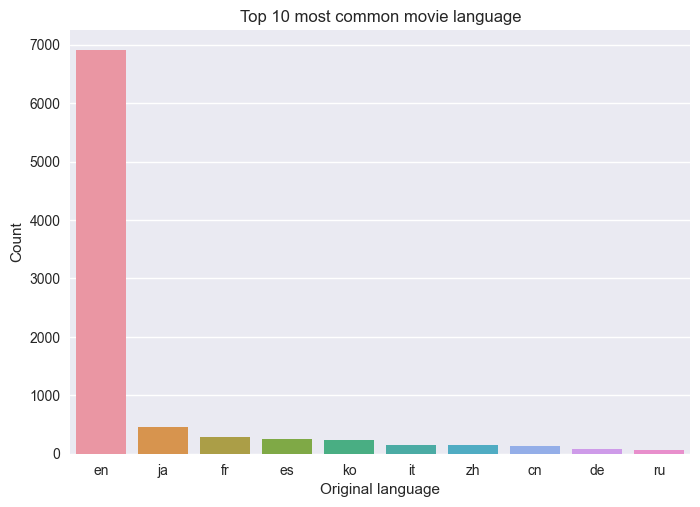

In [313]:
# Plot 10 most common languages
plot_count_bar(df, 'OriginalLanguage', 'Top 10 most common movie language', 'Original language', 10)

The chart shows that the most common language is English, with almost 7000 movies, followed very far by Japanese, French and Spanish.

### Movie count per region

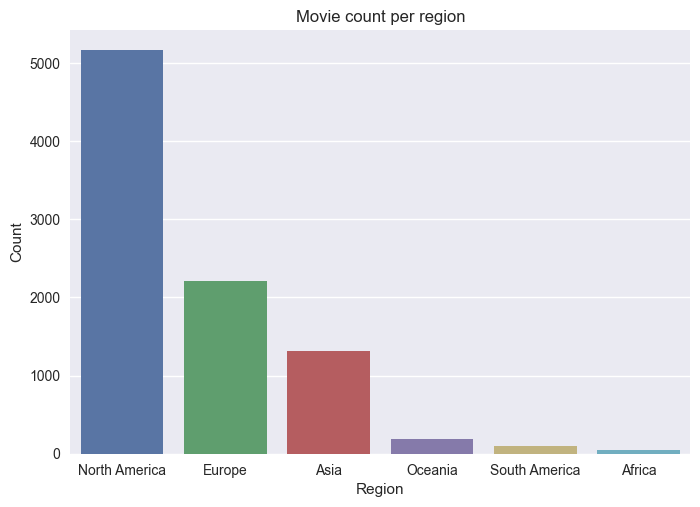

In [314]:
plot_count_bar(df, group_by='Region', title='Movie count per region', xlabel='Region')

As seen in the chart, more than 50% of the movies were filmed in North America, and Europe and Asia are essential regions as well, with more than 3500 movies; finally, the Chart shows that South America and Africa produce very few films.

Decade

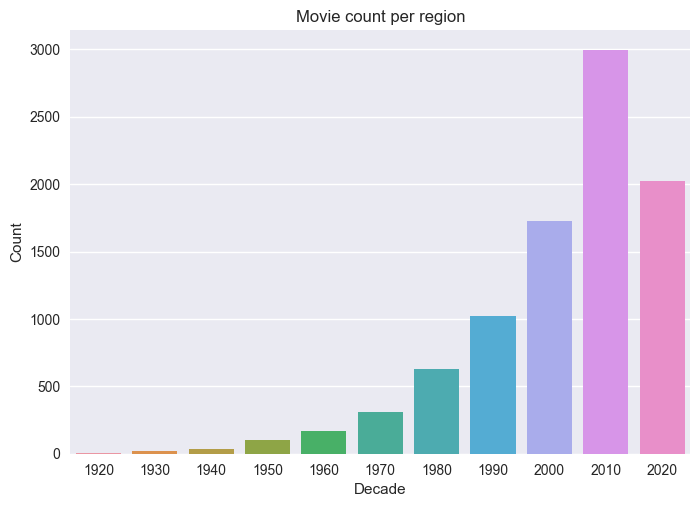

In [315]:
plot_count_bar(df, group_by='Decade', title='Movie count per region', xlabel='Decade')

### Relationship 

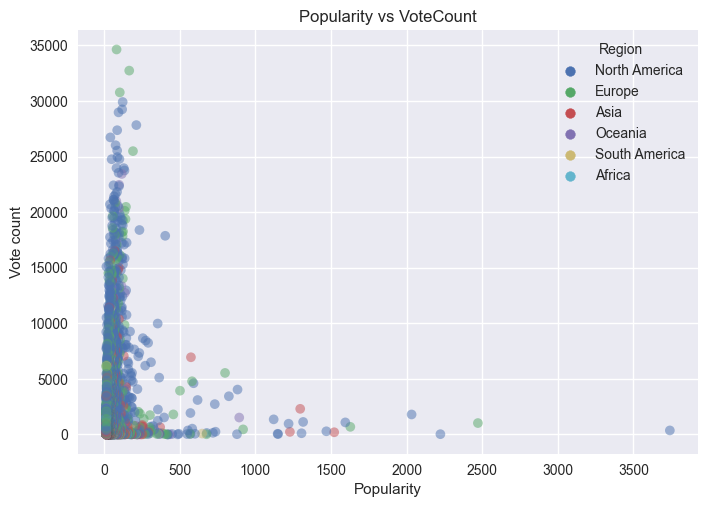

In [316]:
plot_scatter(dataframe=df, x='Popularity', y='VoteCount', ylabel='Vote count')

The chart shows no direct relation between Popularity and vote count and some points that have much popularity but low vote count or low popularity and to much vote count. Concerning the region, as expected, the North American and European movies have more votes and more popularity, except for some points of Asia that have popularity between about 1200 and 1550.

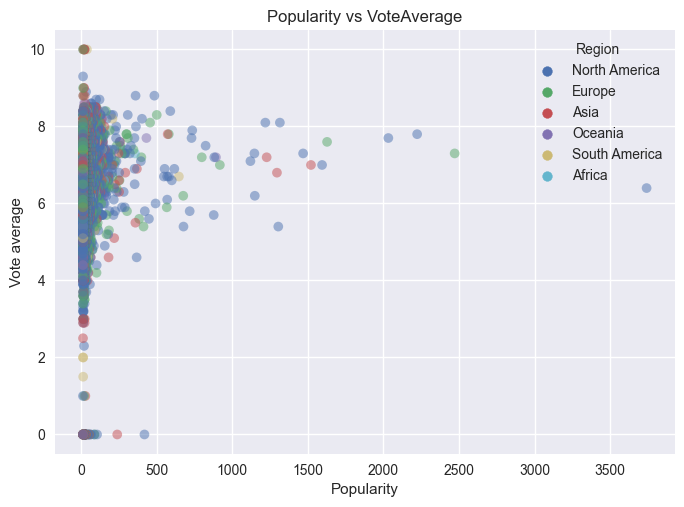

In [317]:
plot_scatter(dataframe=df, x='Popularity', y='VoteAverage', ylabel='Vote average')

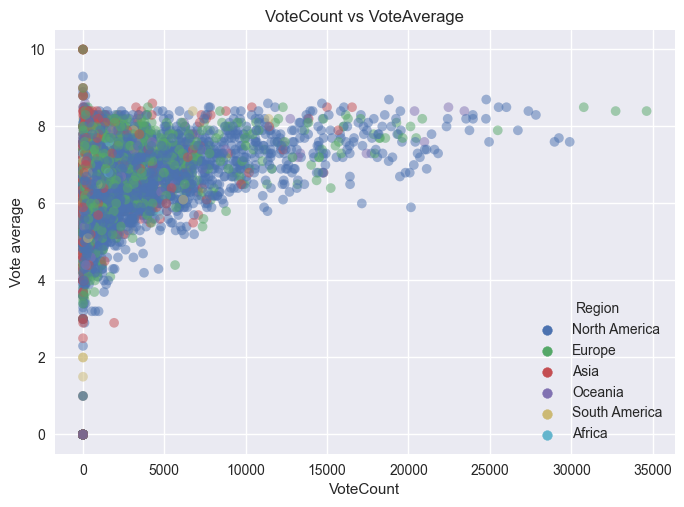

In [318]:
plot_scatter(dataframe=df, x='VoteCount', y='VoteAverage', ylabel='Vote average')

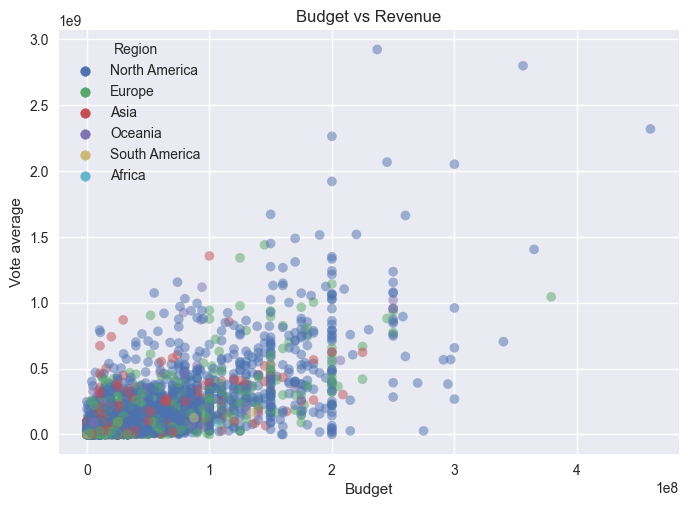

In [319]:
plot_scatter(dataframe=df, x='Budget', y='Revenue', ylabel='Vote average')

Word Cloud for Movie Titles

<Figure size 1000x1000 with 0 Axes>

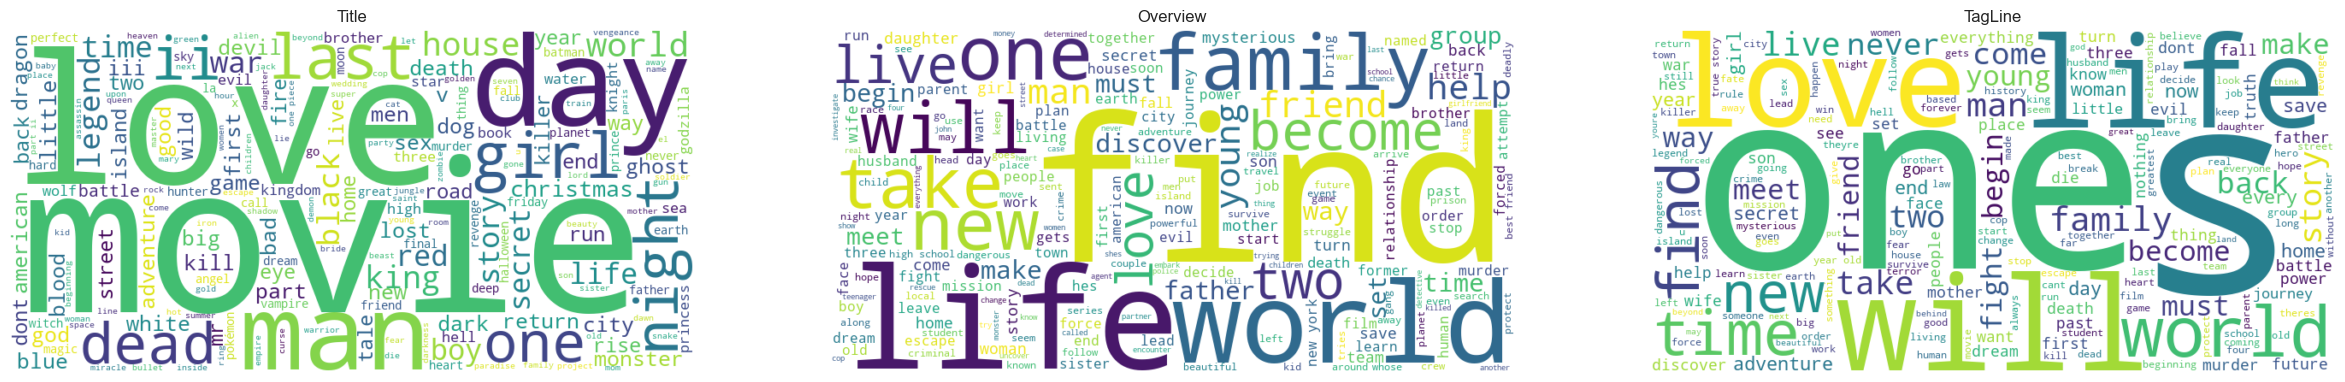

In [345]:
plt.figure(figsize=(10, 10))
fig, axs = plt.subplots(1, 3, figsize=(30, 5))
plot_word_cloud(df, axs[0], 'Title')
plot_word_cloud(df, axs[1], 'Overview')
plot_word_cloud(df, axs[2], 'TagLine')
plt.show();

The charts show the most repeated words in the columns Title, Overview, TagLine. The size indicates the frequency or significance; in this case, the most important words are movie, love, find, life, world and family.

Creating a Histogram for RunTime

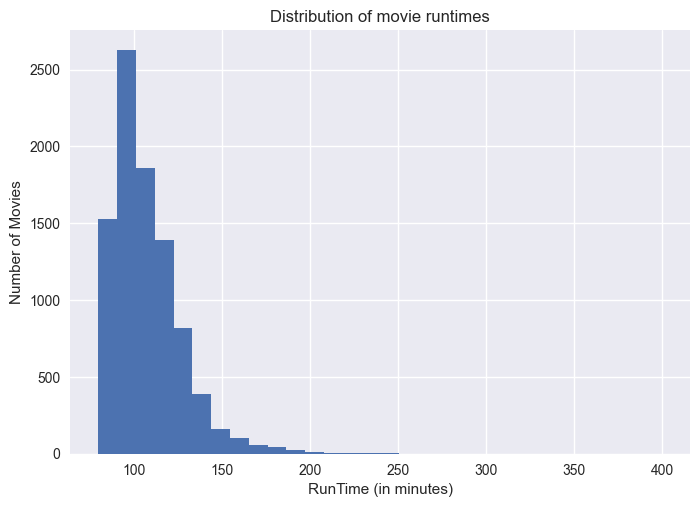

In [351]:
def plot_histogram(dataframe:pd.DataFrame, column_name: str, title: str, bins: int = 30):
    plt.hist(dataframe[column_name].dropna(), bins=bins)
    plt.xlabel('RunTime (in minutes)')
    plt.ylabel('Number of Movies')
    plt.title(title)
    plt.show()

plot_histogram(df, 'RunTime', 'Distribution of movie runtimes')

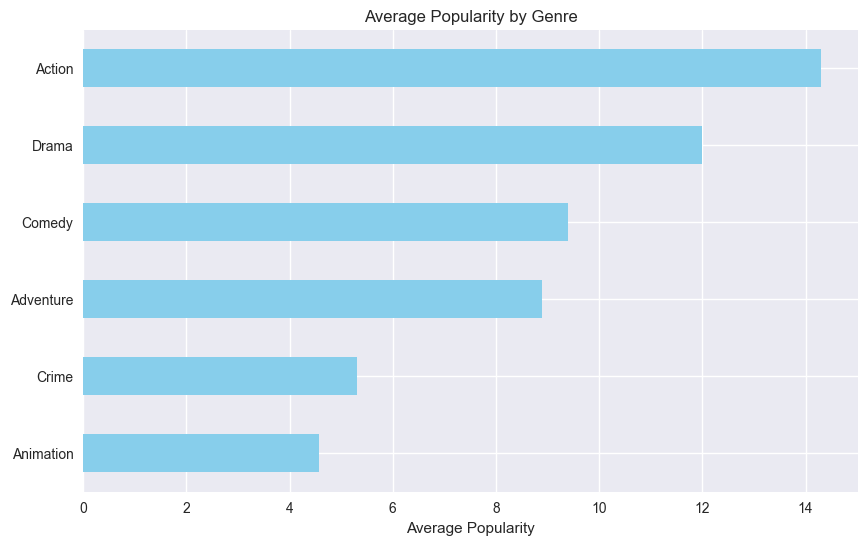

In [352]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama']  # Add all your genre columns
df_genres = df[genre_columns].multiply(df['Popularity'], axis="index")
avg_popularity = df_genres.mean()

# Plot
avg_popularity.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()


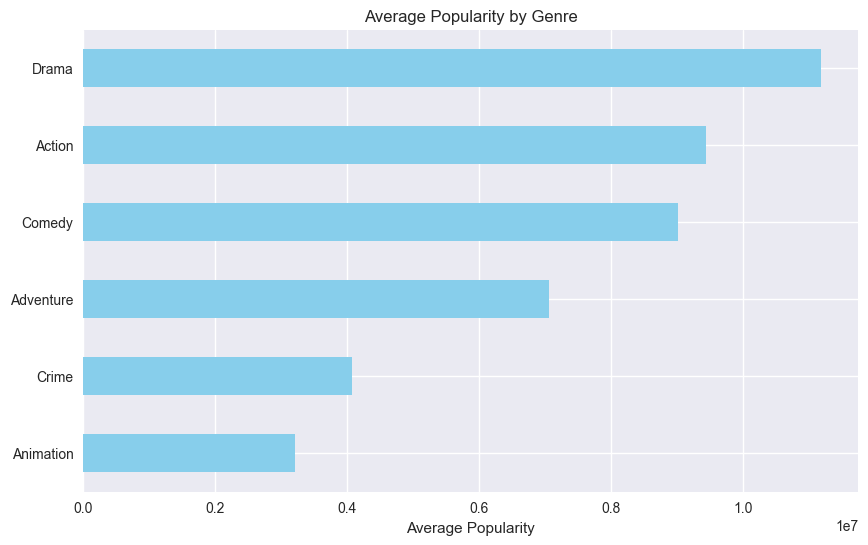

In [325]:
import pandas as pd
import seaborn as sns

# Calculate the average popularity for each genre
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama']  # Add all your genre columns
df_genres = df[genre_columns].multiply(df['Budget'], axis="index")
avg_popularity = df_genres.mean()

# Plot
avg_popularity.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()


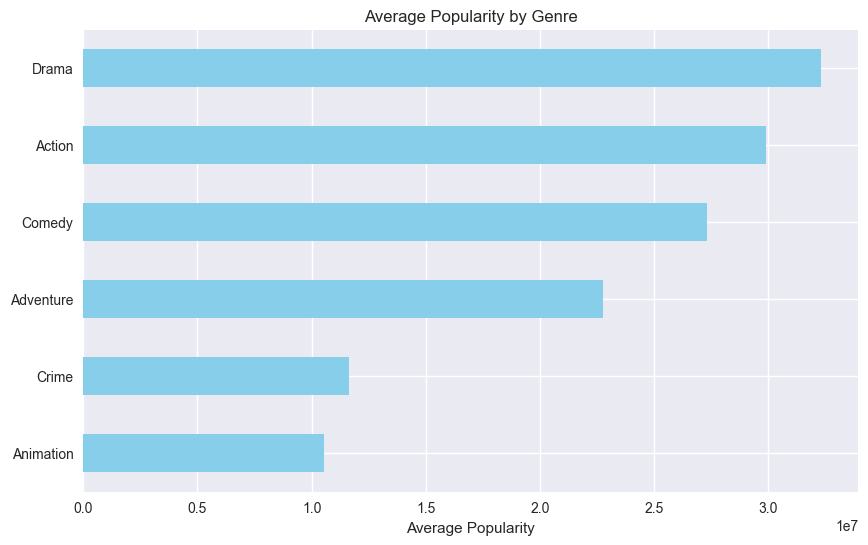

In [326]:
import pandas as pd
import seaborn as sns

# Calculate the average popularity for each genre
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama']  # Add all your genre columns
df_genres = df[genre_columns].multiply(df['Revenue'], axis="index")
avg_popularity = df_genres.mean()

# Plot
avg_popularity.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()


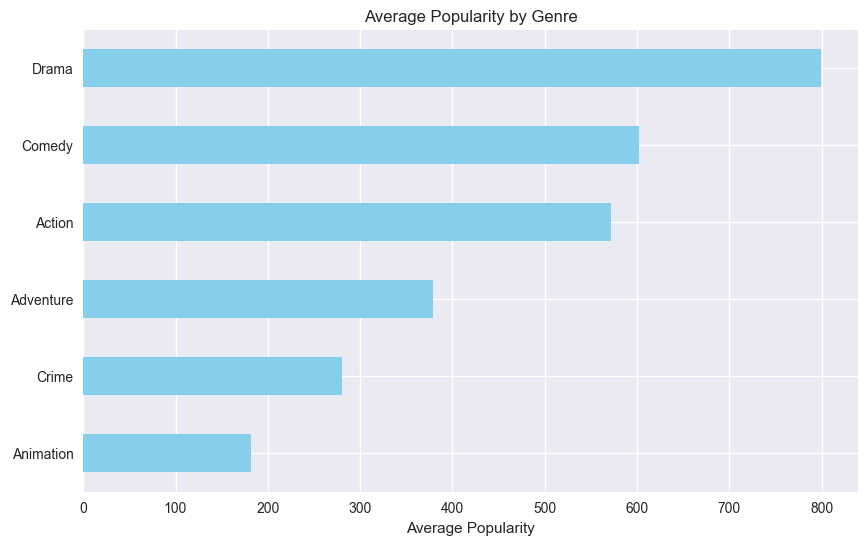

In [327]:
import pandas as pd
import seaborn as sns

# Calculate the average popularity for each genre
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama']  # Add all your genre columns
df_genres = df[genre_columns].multiply(df['Decade'], axis="index")
avg_popularity = df_genres.mean()

# Plot
avg_popularity.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.show()


In [328]:
df.head(2)

,OriginalLanguage,OriginalTitle,Overview,Popularity,Title,VoteAverage,VoteCount,Budget,TagLine,RunTime,Revenue,Decade,Region,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,ScienceFiction,Thriller,TvMovie,War,Western
0,en,Expend4bles,Armed with every weapon they can get their han...,3741.062,Expend4bles,6.4,364.0,100000000.0,They'll die when they're dead.,103.0,30000000.0,2020,North America,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,en,The Equalizer 3,Robert McCall finds himself at home in Souther...,2471.515,The Equalizer 3,7.3,1027.0,70000000.0,Justice knows no borders.,109.0,176933602.0,2020,Europe,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
